## Preprocessing

In [1]:
!pip install keras_tuner -q
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import tensorflow as tf
import warnings
import keras_tuner as kt
from tensorflow.keras.callbacks import ModelCheckpoint

# Disable all warnings
warnings.filterwarnings("ignore")

#  Import and read the charity_data.csv.
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head(5)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 14.3 MB/s eta 0:00:00


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'], axis=1)
application_df_copy = application_df.copy()

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff_value = 500
application_types_to_replace = application_df['APPLICATION_TYPE'].value_counts()[application_df['APPLICATION_TYPE'].value_counts() < cutoff_value].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts = application_df['CLASSIFICATION'].value_counts()
classification_counts[classification_counts > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
cutoff_value = 500
classifications_to_replace = application_df['CLASSIFICATION'].value_counts()[application_df['CLASSIFICATION'].value_counts() < cutoff_value].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
dummy_application_df = pd.get_dummies(application_df)
dummy_application_df.head(5)

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [10]:
# Split our preprocessed data into our features and target arrays
X = dummy_application_df.drop('IS_SUCCESSFUL', axis=1)
y = dummy_application_df['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [12]:
# Define the filepath for saving the weights
checkpoint_filepath = 'weights_checkpoint.h5'

In [13]:
# Create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    save_freq='epoch',
    period=5
)

In [14]:
# Define the model
nn_default = tf.keras.models.Sequential()

# First hidden layer
nn_default.add(tf.keras.layers.Dense(units=80, activation='relu', input_dim=X_train_scaled.shape[1]))

# Second hidden layer
nn_default.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
nn_default.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_default.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3600      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 6,061
Trainable params: 6,061
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compile the model
nn_default.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
# Train the model
history = nn_default.fit(X_train_scaled, y_train, epochs=100, verbose=2, batch_size=16, callbacks=[checkpoint_callback])

Epoch 1/100
1608/1608 - 4s - loss: 0.5698 - accuracy: 0.7220 - 4s/epoch - 3ms/step
Epoch 2/100
1608/1608 - 3s - loss: 0.5536 - accuracy: 0.7273 - 3s/epoch - 2ms/step
Epoch 3/100
1608/1608 - 4s - loss: 0.5514 - accuracy: 0.7285 - 4s/epoch - 2ms/step
Epoch 4/100
1608/1608 - 4s - loss: 0.5494 - accuracy: 0.7323 - 4s/epoch - 3ms/step
Epoch 5/100
1608/1608 - 5s - loss: 0.5475 - accuracy: 0.7326 - 5s/epoch - 3ms/step
Epoch 6/100
1608/1608 - 4s - loss: 0.5474 - accuracy: 0.7325 - 4s/epoch - 2ms/step
Epoch 7/100
1608/1608 - 4s - loss: 0.5468 - accuracy: 0.7336 - 4s/epoch - 3ms/step
Epoch 8/100
1608/1608 - 4s - loss: 0.5454 - accuracy: 0.7339 - 4s/epoch - 3ms/step
Epoch 9/100
1608/1608 - 4s - loss: 0.5449 - accuracy: 0.7342 - 4s/epoch - 3ms/step
Epoch 10/100
1608/1608 - 4s - loss: 0.5448 - accuracy: 0.7348 - 4s/epoch - 2ms/step
Epoch 11/100
1608/1608 - 3s - loss: 0.5435 - accuracy: 0.7356 - 3s/epoch - 2ms/step
Epoch 12/100
1608/1608 - 2s - loss: 0.5438 - accuracy: 0.7350 - 2s/epoch - 1ms/step
E

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_default.evaluate(X_test_scaled,y_test,verbose=1, batch_size=16)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

536/536 [==============================] - 1s 1ms/step - loss: 0.5575 - accuracy: 0.7297
Loss: 0.5574637055397034, Accuracy: 0.72967928647995


In [18]:
# Export our model to HDF5 file
nn_default.save('AlphabetSoupCharity_default_no_op.h5')

## Optimization Preprocessing Method 1 - Add/Drop Columns

In [19]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

# Make a copy of the working dataset
application_df_dropping = application_df_copy.copy()

print("Step 1 of 6 - Start... Samples: ", len(application_df_dropping), " | (No dummies) Columns/Features: ", len(application_df_dropping.columns))

Step 1 of 6 - Start... Samples:  34299  | (No dummies) Columns/Features:  10


In [20]:
cutoff_value = 500
application_types_to_replace = application_df_dropping['APPLICATION_TYPE'].value_counts()[application_df_dropping['APPLICATION_TYPE'].value_counts() < cutoff_value].index.tolist()

for app in application_types_to_replace:
    application_df_dropping['APPLICATION_TYPE'] = application_df_dropping['APPLICATION_TYPE'].replace(app,"Other")

cutoff_value2 = 500
classifications_to_replace = application_df_dropping['CLASSIFICATION'].value_counts()[application_df_dropping['CLASSIFICATION'].value_counts() < cutoff_value2].index.tolist()

for cls in classifications_to_replace:
    application_df_dropping['CLASSIFICATION'] = application_df_dropping['CLASSIFICATION'].replace(cls,"Other")

print("Step 2 of 6 - Simplify 'APPLICATION_TYPE' & 'CLASSIFICATION'... Samples: ", len(application_df_dropping), " | (No dummies) Columns/Features: ", len(application_df_dropping.columns))

Step 2 of 6 - Simplify 'APPLICATION_TYPE' & 'CLASSIFICATION'... Samples:  34299  | (No dummies) Columns/Features:  10


In [21]:
dummy_working_dropping_df = pd.get_dummies(application_df_dropping)
dummy_working_dropping_df.head(3)

print("Step 3 of 6 - Get Dummies... Samples: ", len(dummy_working_dropping_df), " | Columns/Features: ", len(dummy_working_dropping_df.columns))
dummy_working_dropping_df.head(3)

Step 3 of 6 - Get Dummies... Samples:  34299  | Columns/Features:  45


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


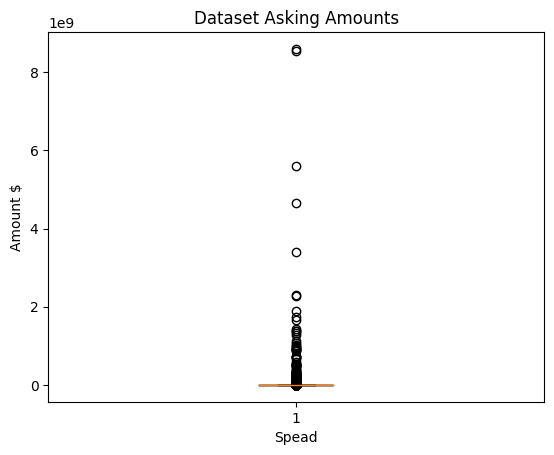

In [22]:
import numpy as np
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.set_title('Dataset Asking Amounts')
ax1.set_ylabel('Amount $')
ax1.set_xlabel('Spead')
ax1.boxplot(dummy_working_dropping_df['ASK_AMT'])
plt.show()

In [23]:
# Determine which data points are outside of the 1.5*IQR range
quartiles = np.quantile(dummy_working_dropping_df['ASK_AMT'],[.25,.75])
iqr = quartiles[1]-quartiles[0]
lower_bound = quartiles[0]-(1.45*iqr)
upper_bound = quartiles[1]+(1.45*iqr)
print("Lower boundry: ", lower_bound, " | Upper boundry: ", upper_bound)

potential_outliers = [AMT for AMT in dummy_working_dropping_df['ASK_AMT'] if AMT < lower_bound or AMT > upper_bound]
print("Samples in dataset prior to outlier removal: " + str(len(dummy_working_dropping_df['ASK_AMT'])))
print("After outlier removal: " + str(len(dummy_working_dropping_df['ASK_AMT']) - len(potential_outliers)))

Lower boundry:  1024.1  | Upper boundry:  11717.9
Samples in dataset prior to outlier removal: 34299
After outlier removal: 26078


In [24]:
# Drop the unnecessary rows from the dataset
condensed_data = dummy_working_dropping_df[~dummy_working_dropping_df['ASK_AMT'].isin(potential_outliers)]
print("Step 4 of 6 - Remove rows where 'ASK_AMT' is an outlier... Samples: ", len(condensed_data), " | Columns/Features: ", len(condensed_data.columns))

Step 4 of 6 - Remove rows where 'ASK_AMT' is an outlier... Samples:  26078  | Columns/Features:  45


In [25]:
X_dropping = condensed_data.drop('IS_SUCCESSFUL', axis=1)
y_dropping = condensed_data['IS_SUCCESSFUL']

X_train_column_drop, X_test_column_drop, y_train_column_drop, y_test_column_drop = train_test_split(X_dropping, y_dropping, test_size=0.25, random_state=1)

print("Step 5 of 6 - Split training and testing samples... Samples: ", len(X_train_column_drop), " | Columns/Features: ", len(X_train_column_drop.columns))

Step 5 of 6 - Split training and testing samples... Samples:  19558  | Columns/Features:  44


In [26]:
# Create a Lasso model
lasso_model = Lasso(alpha=0.1)  # Adjust the alpha parameter for regularization strength
lasso_model.fit(X_train_column_drop, y_train_column_drop)

lasso_predictions = lasso_model.predict(X_test_column_drop)
lasso_rmse = mean_squared_error(y_test_column_drop, lasso_predictions, squared=False)
print("Lasso RMSE:", lasso_rmse)

# Create a Ridge model
ridge_model = Ridge(alpha=0.1)  # Adjust the alpha parameter for regularization strength
ridge_model.fit(X_train_column_drop, y_train_column_drop)

ridge_predictions = ridge_model.predict(X_test_column_drop)
ridge_rmse = mean_squared_error(y_test_column_drop, ridge_predictions, squared=False)
print("Ridge RMSE:", ridge_rmse)

print("- - -")

lasso_coeffs = lasso_model.coef_
ridge_coeffs = ridge_model.coef_

# make an array of columns to drop after failing Lasso and Ridge tests
drop_columns = []

Lower_Ridge = -0.005
Upper_Ridge = 0.005

for i in range(len(lasso_coeffs)):
    if lasso_coeffs[i] == 0 and ((ridge_coeffs[i] > Lower_Ridge and ridge_coeffs[i] <= 0) or (ridge_coeffs[i] < Upper_Ridge and ridge_coeffs[i] >= 0)):
        drop_columns.append(i)

print(drop_columns)
print("# of Columns/Features that will be dropped", len(drop_columns))

# remove columns from X1 df
X_train_column_drop = X_train_column_drop.drop(X_train_column_drop.columns[drop_columns], axis=1)
X_test_column_drop = X_test_column_drop.drop(X_test_column_drop.columns[drop_columns], axis=1)

print("Step 6 of 6 - Remove Columns that fail Lasso & Ridge Tests... Samples: ", len(X_train_column_drop), " | Columns/Features: ", len(X_train_column_drop.columns))

Lasso RMSE: 0.4993190478758795
Ridge RMSE: 0.4307788485480379
- - -
[2, 27]
# of Columns/Features that will be dropped 2
Step 6 of 6 - Remove Columns that fail Lasso & Ridge Tests... Samples:  19558  | Columns/Features:  42


In [27]:
X_scaler_columns_dropped = scaler.fit(X_train_column_drop)

X_train_column_drop_scaled = X_scaler_columns_dropped.transform(X_train_column_drop)
X_test_column_drop_scaled = X_scaler_columns_dropped.transform(X_test_column_drop)

# Define the model
nn_column_drop = tf.keras.models.Sequential()

# First hidden layer
nn_column_drop.add(tf.keras.layers.Dense(units=80, activation='relu', input_dim=X_train_column_drop_scaled.shape[1]))

# Second hidden layer
nn_column_drop.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
nn_column_drop.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_column_drop.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                3440      
                                                                 
 dense_4 (Dense)             (None, 30)                2430      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,901
Trainable params: 5,901
Non-trainable params: 0
_________________________________________________________________


In [28]:
nn_column_drop.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_column_drop = nn_column_drop.fit(X_train_column_drop_scaled, y_train_column_drop, epochs=20, verbose=1, batch_size=16)

Epoch 1/20
1223/1223 [==============================] - 3s 2ms/step - loss: 0.5559 - accuracy: 0.7364
Epoch 2/20
1223/1223 [==============================] - 2s 2ms/step - loss: 0.5389 - accuracy: 0.7428
Epoch 3/20
1223/1223 [==============================] - 2s 2ms/step - loss: 0.5362 - accuracy: 0.7446
Epoch 4/20
1223/1223 [==============================] - 2s 2ms/step - loss: 0.5337 - accuracy: 0.7436
Epoch 5/20
1223/1223 [==============================] - 2s 2ms/step - loss: 0.5326 - accuracy: 0.7417
Epoch 6/20
1223/1223 [==============================] - 2s 2ms/step - loss: 0.5322 - accuracy: 0.7460
Epoch 7/20
1223/1223 [==============================] - 2s 2ms/step - loss: 0.5315 - accuracy: 0.7479
Epoch 8/20
1223/1223 [==============================] - 3s 2ms/step - loss: 0.5310 - accuracy: 0.7455
Epoch 9/20
1223/1223 [==============================] - 2s 2ms/step - loss: 0.5303 - accuracy: 0.7464
Epoch 10/20
1223/1223 [==============================] - 2s 2ms/step - loss: 0.529

In [29]:
model_loss, model_accuracy = nn_column_drop.evaluate(X_test_column_drop_scaled,y_test_column_drop,verbose=1, batch_size=16)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

408/408 [==============================] - 1s 1ms/step - loss: 0.5363 - accuracy: 0.7560
Loss: 0.5362584590911865, Accuracy: 0.7559816241264343


In [30]:
# Export our model to HDF5 file
nn_column_drop.save('AlphabetSoupCharity_Optimization_Dropping_Columns.h5')

## Optimization Preprocessing Method 2 - PCA

In [31]:
# Create PCA Model
pca_model = PCA(n_components=20)

In [32]:
X_scaler_PCA = scaler.fit(X_train_column_drop)

X_train_pre_pca_scaled = X_scaler_PCA.transform(X_train_column_drop)
X_test_pre_pca_scaled = X_scaler_PCA.transform(X_test_column_drop)

In [33]:
pca_model = pca_model.fit(X_train_pre_pca_scaled)

pca_X_train = pca_model.transform(X_train_pre_pca_scaled)
pca_X_test = pca_model.transform(X_test_pre_pca_scaled)

# Training DataFrame with the PCA components
pca_df = pd.DataFrame(data=pca_X_train, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 
                                                'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20'])
                                              #  'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30',
                                              #  'PC31', 'PC32', 'PC33', 'PC34', 'PC35'])

# View the first five rows of the DataFrame
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,1.668502,0.363421,-1.220337,0.805760,0.226610,-0.414922,-0.224241,-0.080414,0.086268,-0.131248,0.009355,-0.274115,-0.019723,-0.103786,0.094933,0.092107,0.100130,0.191607,0.201502,-0.096928
1,0.053277,1.357294,-1.930118,1.354460,1.639617,0.324711,-0.296157,-0.048261,-0.186113,-0.070319,-0.074350,0.790519,-0.189532,-1.530491,-2.491665,-0.417350,1.930841,0.922302,-0.841940,0.233404
2,-5.161517,1.530676,0.467306,-0.434179,-2.759748,-1.760149,-1.151587,0.060584,-0.404862,0.395579,0.413173,-1.889791,0.147674,0.924262,-1.648319,2.488162,-0.371878,0.622338,0.136226,-0.101500
3,-1.072659,-1.747413,1.137547,-0.682386,-0.168969,1.235400,1.106741,0.156141,0.667699,-0.357118,-0.041770,-0.288578,-0.080338,-0.068402,-0.058469,-0.004910,0.024032,-0.199984,0.099535,-0.047244
4,-1.014762,-2.029897,1.389449,-0.778170,0.368212,-0.899760,1.333917,-0.079617,-1.317306,0.234652,0.353476,0.116561,0.376920,-0.398145,0.014440,-0.068135,-0.055933,-0.131655,0.243948,-0.078366


In [34]:
# Retrieve the explained variance from the PCA model
explained_variance = pca_model.explained_variance_ratio_
Scope = 0

# Print the explained variance for each principal component
for i, variance in enumerate(explained_variance):
    Scope = Scope + variance
    print(f"Explained Variance PC{i+1}: {variance:.4f}")

print(f"{Scope * 100:.2f}%")

Explained Variance PC1: 0.0967
Explained Variance PC2: 0.0606
Explained Variance PC3: 0.0495
Explained Variance PC4: 0.0485
Explained Variance PC5: 0.0439
Explained Variance PC6: 0.0354
Explained Variance PC7: 0.0321
Explained Variance PC8: 0.0309
Explained Variance PC9: 0.0271
Explained Variance PC10: 0.0270
Explained Variance PC11: 0.0258
Explained Variance PC12: 0.0256
Explained Variance PC13: 0.0253
Explained Variance PC14: 0.0251
Explained Variance PC15: 0.0248
Explained Variance PC16: 0.0246
Explained Variance PC17: 0.0243
Explained Variance PC18: 0.0242
Explained Variance PC19: 0.0239
Explained Variance PC20: 0.0238
69.89%


In [35]:
# Define the model
nn_pca = tf.keras.models.Sequential()

# First hidden layer
nn_pca.add(tf.keras.layers.Dense(units=80, activation='relu', input_dim=pca_X_train.shape[1]))

# Second hidden layer
nn_pca.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
nn_pca.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_pca.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 80)                1680      
                                                                 
 dense_7 (Dense)             (None, 30)                2430      
                                                                 
 dense_8 (Dense)             (None, 1)                 31        
                                                                 
Total params: 4,141
Trainable params: 4,141
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Compile the model
nn_pca.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
# Train the model
history_pca = nn_pca.fit(pca_X_train, y_train_column_drop, epochs=20, verbose=1, batch_size=16)

Epoch 1/20
1223/1223 [==============================] - 3s 2ms/step - loss: 0.5531 - accuracy: 0.7356
Epoch 2/20
1223/1223 [==============================] - 2s 2ms/step - loss: 0.5401 - accuracy: 0.7425
Epoch 3/20
1223/1223 [==============================] - 2s 2ms/step - loss: 0.5384 - accuracy: 0.7442
Epoch 4/20
1223/1223 [==============================] - 2s 2ms/step - loss: 0.5367 - accuracy: 0.7442
Epoch 5/20
1223/1223 [==============================] - 3s 2ms/step - loss: 0.5352 - accuracy: 0.7436
Epoch 6/20
1223/1223 [==============================] - 2s 2ms/step - loss: 0.5334 - accuracy: 0.7455
Epoch 7/20
1223/1223 [==============================] - 2s 2ms/step - loss: 0.5330 - accuracy: 0.7449
Epoch 8/20
1223/1223 [==============================] - 2s 2ms/step - loss: 0.5325 - accuracy: 0.7464
Epoch 9/20
1223/1223 [==============================] - 2s 2ms/step - loss: 0.5310 - accuracy: 0.7464
Epoch 10/20
1223/1223 [==============================] - 2s 2ms/step - loss: 0.531

In [38]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_pca.evaluate(pca_X_test, y_test_column_drop, verbose=1, batch_size=16)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

408/408 [==============================] - 1s 1ms/step - loss: 0.5305 - accuracy: 0.7532
Loss: 0.5304990410804749, Accuracy: 0.7532208561897278


In [39]:
# Export our model to HDF5 file
nn_pca.save('AlphabetSoupCharity_Optimization_PCA.h5')

## Optimization Preprocessing Method 3 - Oversampling

In [40]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

#from imblearn.over_sampling import SMOTE

desired_samples = round(0.65 * len(X_train_column_drop_scaled))
sampling_strategy = {0: desired_samples}

# Instantiate the SMOTE model
#smote_oversampler = SMOTE(sampling_strategy=sampling_strategy, random_state=1)
# SMOTE oversampler resulted in lower accuracy

# Instantiate the random oversampler model
random_oversampler = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=1)

# Fit the original training data to the random_oversampler model
X_train_oversampled_scaled, y_train_oversampled = random_oversampler.fit_resample(pca_X_train, y_train_column_drop)

In [41]:
X_train_column_drop_scaled_df = pd.DataFrame(X_train_column_drop_scaled)
X_train_oversampled_scaled_df = pd.DataFrame(X_train_oversampled_scaled)
print("X Train Before Resampling: ", X_train_column_drop_scaled_df.shape)
print("X Train After Resampling: ", X_train_oversampled_scaled.shape)

y_train_column_drop_df = pd.DataFrame(y_train_column_drop)
y_train_oversampled_df = pd.DataFrame(y_train_oversampled)
print("Y Train Before Resampling: ", y_train_column_drop_df.shape)
print("Y Train After Resampling: ", y_train_oversampled_df.shape)

X Train Before Resampling:  (19558, 42)
X Train After Resampling:  (23023, 20)
Y Train Before Resampling:  (19558, 1)
Y Train After Resampling:  (23023, 1)


In [42]:
# Define the model
nn_oversample = tf.keras.models.Sequential()

# First hidden layer
nn_oversample.add(tf.keras.layers.Dense(units=80, activation='relu', input_dim=X_train_oversampled_scaled_df.shape[1]))

# Second hidden layer
nn_oversample.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
nn_oversample.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_oversample.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 80)                1680      
                                                                 
 dense_10 (Dense)            (None, 30)                2430      
                                                                 
 dense_11 (Dense)            (None, 1)                 31        
                                                                 
Total params: 4,141
Trainable params: 4,141
Non-trainable params: 0
_________________________________________________________________


In [43]:
nn_oversample.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_oversample = nn_oversample.fit(X_train_oversampled_scaled_df, y_train_oversampled_df, epochs=20, verbose=2, batch_size=16)

Epoch 1/20
1439/1439 - 3s - loss: 0.5483 - accuracy: 0.7349 - 3s/epoch - 2ms/step
Epoch 2/20
1439/1439 - 3s - loss: 0.5352 - accuracy: 0.7426 - 3s/epoch - 2ms/step
Epoch 3/20
1439/1439 - 2s - loss: 0.5336 - accuracy: 0.7437 - 2s/epoch - 1ms/step
Epoch 4/20
1439/1439 - 2s - loss: 0.5321 - accuracy: 0.7452 - 2s/epoch - 1ms/step
Epoch 5/20
1439/1439 - 2s - loss: 0.5313 - accuracy: 0.7455 - 2s/epoch - 1ms/step
Epoch 6/20
1439/1439 - 2s - loss: 0.5297 - accuracy: 0.7455 - 2s/epoch - 1ms/step
Epoch 7/20
1439/1439 - 2s - loss: 0.5284 - accuracy: 0.7458 - 2s/epoch - 1ms/step
Epoch 8/20
1439/1439 - 3s - loss: 0.5288 - accuracy: 0.7462 - 3s/epoch - 2ms/step
Epoch 9/20
1439/1439 - 2s - loss: 0.5277 - accuracy: 0.7463 - 2s/epoch - 1ms/step
Epoch 10/20
1439/1439 - 2s - loss: 0.5274 - accuracy: 0.7474 - 2s/epoch - 1ms/step
Epoch 11/20
1439/1439 - 2s - loss: 0.5269 - accuracy: 0.7468 - 2s/epoch - 1ms/step
Epoch 12/20
1439/1439 - 2s - loss: 0.5265 - accuracy: 0.7481 - 2s/epoch - 1ms/step
Epoch 13/20
1

In [44]:
model_loss, model_accuracy = nn_oversample.evaluate(pca_X_test,y_test_column_drop,verbose=1, batch_size=16)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

408/408 [==============================] - 1s 2ms/step - loss: 0.5342 - accuracy: 0.7575
Loss: 0.5341549515724182, Accuracy: 0.7575153112411499


In [45]:
# Export our model to HDF5 file
nn_oversample.save('AlphabetSoupCharity_Optimization_Oversampling.h5')

## Model Builder Function

In [46]:
# Model creation function for ease of coding later
def create_model_find_activation(hp, layer_min, layer_max, n_range_min, n_range_max):
    nn_model = tf.keras.models.Sequential()

    initial_activation = hp.Choice('initial activation', ['tanh']) # removed 'relu', 'leaky_relu', 'tanh', 'selu', 'elu', & 'sigmoid'

    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=80,
        max_value=80,
        step=5), activation=initial_activation, input_dim=X_train_oversampled_scaled_df.shape[1]))
    
    for i in range(hp.Int('num_layers', layer_min, layer_max)):
        layer_activation = hp.Choice('layer_activation_' + str(i), ['relu', 'tanh'])
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
        min_value=n_range_min,
        max_value=n_range_max,
        step=5),
        activation=layer_activation))

    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

## Model Optimization Method 1 - Altering Activation Only

In [45]:
activation_tuner = kt.Hyperband(
    lambda hp: create_model_find_activation(hp, 1, 1, 30, 80),
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

In [46]:
activation_tuner.search(X_train_oversampled_scaled_df,y_train_oversampled_df,epochs=10,validation_data=(pca_X_test,y_test_column_drop), batch_size=16)

Trial 29 Complete [00h 01m 20s]
val_accuracy: 0.7567484378814697

Best val_accuracy So Far: 0.758128821849823
Total elapsed time: 00h 16m 55s


In [53]:
top_activation = activation_tuner.get_best_hyperparameters(3)

for param in top_activation:
    for key, value in param.values.items():
        print(f"{key}: {value}")
    print("- - -")

initial activation: tanh
first_units: 80
num_layers: 1
layer_activation_0: tanh
units_0: 75
tuner/epochs: 20
tuner/initial_epoch: 7
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0019
- - -
initial activation: tanh
first_units: 80
num_layers: 1
layer_activation_0: tanh
units_0: 75
tuner/epochs: 7
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
- - -
initial activation: tanh
first_units: 80
num_layers: 1
layer_activation_0: tanh
units_0: 80
tuner/epochs: 20
tuner/initial_epoch: 7
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0022
- - -


In [48]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_activation_optimized = tf.keras.models.Sequential()

# Take optimized hyperparams and make a model
nn_activation_optimized.add(tf.keras.layers.Dense(units=top_activation[0].values.get('first_units'), activation=top_activation[0].values.get('initial activation'), input_dim=X_train_oversampled_scaled_df.shape[1]))
for i in range(top_activation[0].values.get('num_layers')):
    nn_activation_optimized.add(tf.keras.layers.Dense(units=top_activation[0].values.get(f'units_{i}'), activation=top_activation[0].values.get('layer activation')))

# Output layer
nn_activation_optimized.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_activation_optimized.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                1680      
                                                                 
 dense_4 (Dense)             (None, 75)                6075      
                                                                 
 dense_5 (Dense)             (None, 1)                 76        
                                                                 
Total params: 7,831
Trainable params: 7,831
Non-trainable params: 0
_________________________________________________________________


In [49]:
# Compile the model
nn_activation_optimized.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
# Train the model
history_activation_optimized = nn_activation_optimized.fit(X_train_oversampled_scaled_df,y_train_oversampled_df, epochs=20, verbose=1, batch_size=16)

Epoch 1/20
1439/1439 [==============================] - 4s 2ms/step - loss: 0.5650 - accuracy: 0.7269
Epoch 2/20
1439/1439 [==============================] - 4s 3ms/step - loss: 0.5507 - accuracy: 0.7347
Epoch 3/20
1439/1439 [==============================] - 3s 2ms/step - loss: 0.5436 - accuracy: 0.7386
Epoch 4/20
1439/1439 [==============================] - 3s 2ms/step - loss: 0.5394 - accuracy: 0.7407
Epoch 5/20
1439/1439 [==============================] - 3s 2ms/step - loss: 0.5380 - accuracy: 0.7410
Epoch 6/20
1439/1439 [==============================] - 4s 3ms/step - loss: 0.5349 - accuracy: 0.7438
Epoch 7/20
1439/1439 [==============================] - 3s 2ms/step - loss: 0.5348 - accuracy: 0.7431
Epoch 8/20
1439/1439 [==============================] - 3s 2ms/step - loss: 0.5332 - accuracy: 0.7436
Epoch 9/20
1439/1439 [==============================] - 3s 2ms/step - loss: 0.5330 - accuracy: 0.7430
Epoch 10/20
1439/1439 [==============================] - 4s 3ms/step - loss: 0.532

In [51]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_activation_optimized.evaluate(pca_X_test,y_test_column_drop,verbose=1, batch_size=16)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

408/408 [==============================] - 1s 2ms/step - loss: 0.5333 - accuracy: 0.7529
Loss: 0.5333229303359985, Accuracy: 0.7529141306877136


In [52]:
# Export our model to HDF5 file
nn_activation_optimized.save('AlphabetSoupCharity_Activtion_Optimization.h5')

## Model Optimization Method 2 - Altering Activation, Hidden Layers, and Neurons

In [47]:
layerNeuron_tuner = kt.Hyperband(
    lambda hp: create_model_find_activation(hp, 3, 8, 30, 80),
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

layerNeuron_tuner.search(X_train_oversampled_scaled_df,y_train_oversampled_df,epochs=10,validation_data=(pca_X_test,y_test_column_drop), batch_size=16)

Trial 60 Complete [00h 01m 24s]
val_accuracy: 0.7565950751304626

Best val_accuracy So Far: 0.7587423324584961
Total elapsed time: 00h 39m 46s


In [50]:
top_nn = layerNeuron_tuner.get_best_hyperparameters(3)

for param in top_nn:
    for key, value in param.values.items():
        print(f"{key}: {value}")
    print("- - -")

initial activation: tanh
first_units: 80
num_layers: 3
layer_activation_0: relu
units_0: 55
layer_activation_1: relu
units_1: 60
layer_activation_2: relu
units_2: 50
layer_activation_3: tanh
units_3: 50
tuner/epochs: 20
tuner/initial_epoch: 7
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0015
layer_activation_4: relu
units_4: 70
layer_activation_5: relu
units_5: 55
layer_activation_6: relu
units_6: 50
layer_activation_7: tanh
units_7: 70
- - -
initial activation: tanh
first_units: 80
num_layers: 3
layer_activation_0: relu
units_0: 60
layer_activation_1: tanh
units_1: 30
layer_activation_2: relu
units_2: 65
layer_activation_3: relu
units_3: 60
layer_activation_4: tanh
units_4: 30
layer_activation_5: tanh
units_5: 50
layer_activation_6: tanh
units_6: 35
layer_activation_7: relu
units_7: 70
tuner/epochs: 20
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
- - -
initial activation: tanh
first_units: 80
num_layers: 7
layer_activation_0: tanh
units_0: 45
layer_activation_1: tanh
unit

In [52]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_layerNeuron = tf.keras.models.Sequential()

# Take optimized hyperparams and make a model
nn_layerNeuron.add(tf.keras.layers.Dense(units=top_nn[0].values.get('first_units'), activation=top_nn[0].values.get('initial activation'), input_dim=X_train_oversampled_scaled_df.shape[1]))
for i in range(top_nn[0].values.get('num_layers')):
    nn_layerNeuron.add(tf.keras.layers.Dense(units=top_nn[0].values.get(f'units_{i}'), activation=top_nn[0].values.get('layer activation')))

# Output layer
nn_layerNeuron.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_layerNeuron.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 80)                1680      
                                                                 
 dense_9 (Dense)             (None, 55)                4455      
                                                                 
 dense_10 (Dense)            (None, 60)                3360      
                                                                 
 dense_11 (Dense)            (None, 50)                3050      
                                                                 
 dense_12 (Dense)            (None, 1)                 51        
                                                                 
Total params: 12,596
Trainable params: 12,596
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Compile the model
nn_layerNeuron.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_layerNeuron_optimized = nn_layerNeuron.fit(X_train_oversampled_scaled_df,y_train_oversampled_df, epochs=20, verbose=1, batch_size=16)

Epoch 1/20
1439/1439 [==============================] - 4s 2ms/step - loss: 0.5669 - accuracy: 0.7269
Epoch 2/20
1439/1439 [==============================] - 3s 2ms/step - loss: 0.5559 - accuracy: 0.7342
Epoch 3/20
1439/1439 [==============================] - 3s 2ms/step - loss: 0.5471 - accuracy: 0.7388
Epoch 4/20
1439/1439 [==============================] - 3s 2ms/step - loss: 0.5427 - accuracy: 0.7393
Epoch 5/20
1439/1439 [==============================] - 3s 2ms/step - loss: 0.5394 - accuracy: 0.7409
Epoch 6/20
1439/1439 [==============================] - 3s 2ms/step - loss: 0.5371 - accuracy: 0.7425
Epoch 7/20
1439/1439 [==============================] - 4s 2ms/step - loss: 0.5357 - accuracy: 0.7450
Epoch 8/20
1439/1439 [==============================] - 3s 2ms/step - loss: 0.5346 - accuracy: 0.7456
Epoch 9/20
1439/1439 [==============================] - 3s 2ms/step - loss: 0.5340 - accuracy: 0.7444
Epoch 10/20
1439/1439 [==============================] - 3s 2ms/step - loss: 0.532

In [54]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_layerNeuron.evaluate(pca_X_test,y_test_column_drop,verbose=1, batch_size=16)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

# Export our model to HDF5 file
nn_layerNeuron.save('AlphabetSoupCharity_layerNeuron_Optimization_FINAL.h5')

408/408 [==============================] - 1s 2ms/step - loss: 0.5368 - accuracy: 0.7515
Loss: 0.5368475317955017, Accuracy: 0.7515337467193604
